In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/metalab_legion/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/tmp/ipykernel_46189/2800772778.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/metalab_legion/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not availa

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.562025,0.708492,0.470321,0.709281,0.397949,0.664911,0.361903,0.578614,0.366568,0.499667,...,0.542836,0.562578,0.481586,0.529806,0.416910,0.531154,0.471333,0.546092,0.519222,close
1,0.544867,0.716651,0.457869,0.719337,0.392045,0.674012,0.350812,0.606378,0.351128,0.534159,...,0.445686,0.553423,0.476524,0.539955,0.386201,0.520814,0.388150,0.518589,0.428197,close
2,0.571775,0.719538,0.469626,0.696609,0.404019,0.656240,0.372715,0.568767,0.377689,0.489301,...,0.574734,0.569453,0.496559,0.532649,0.442900,0.535934,0.508402,0.551697,0.544996,close
3,0.569689,0.717038,0.472001,0.705320,0.406685,0.659466,0.376835,0.567457,0.383124,0.488263,...,0.570680,0.571617,0.493254,0.539169,0.439257,0.544639,0.504984,0.557290,0.541313,close
4,0.544318,0.711340,0.464116,0.723961,0.393009,0.674679,0.347523,0.609027,0.346092,0.531983,...,0.446308,0.556138,0.470413,0.540273,0.381095,0.520602,0.386520,0.519583,0.428572,close
5,0.549911,0.714441,0.463759,0.722322,0.395558,0.673700,0.353017,0.605117,0.352518,0.529844,...,0.440474,0.557217,0.470683,0.541709,0.384349,0.524407,0.387151,0.525573,0.430820,close
6,0.573455,0.718346,0.470980,0.694999,0.405388,0.656251,0.374166,0.569362,0.379944,0.489614,...,0.572980,0.569043,0.495423,0.532904,0.440617,0.536824,0.506139,0.552016,0.542373,close
7,0.544746,0.712042,0.464281,0.721353,0.394229,0.674190,0.349481,0.607848,0.347858,0.530862,...,0.445699,0.554402,0.471660,0.538915,0.381861,0.520947,0.388435,0.520810,0.430985,close
8,0.576112,0.718413,0.474919,0.695469,0.408838,0.654878,0.375912,0.568507,0.382194,0.489313,...,0.571520,0.574505,0.491805,0.540612,0.438837,0.544793,0.507135,0.558088,0.543927,close
9,0.752243,0.877854,0.662477,0.853285,0.593088,0.764388,0.545096,0.688341,0.496554,0.651854,...,0.389588,0.777728,0.615804,0.790762,0.534691,0.797614,0.483282,0.800612,0.433498,open


In [3]:
df = df.rename(columns={42: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,Output
0,0.562025,0.708492,0.470321,0.709281,0.397949,0.664911,0.361903,0.578614,0.366568,0.499667,...,0.542836,0.562578,0.481586,0.529806,0.416910,0.531154,0.471333,0.546092,0.519222,close
1,0.544867,0.716651,0.457869,0.719337,0.392045,0.674012,0.350812,0.606378,0.351128,0.534159,...,0.445686,0.553423,0.476524,0.539955,0.386201,0.520814,0.388150,0.518589,0.428197,close
2,0.571775,0.719538,0.469626,0.696609,0.404019,0.656240,0.372715,0.568767,0.377689,0.489301,...,0.574734,0.569453,0.496559,0.532649,0.442900,0.535934,0.508402,0.551697,0.544996,close
3,0.569689,0.717038,0.472001,0.705320,0.406685,0.659466,0.376835,0.567457,0.383124,0.488263,...,0.570680,0.571617,0.493254,0.539169,0.439257,0.544639,0.504984,0.557290,0.541313,close
4,0.544318,0.711340,0.464116,0.723961,0.393009,0.674679,0.347523,0.609027,0.346092,0.531983,...,0.446308,0.556138,0.470413,0.540273,0.381095,0.520602,0.386520,0.519583,0.428572,close
5,0.549911,0.714441,0.463759,0.722322,0.395558,0.673700,0.353017,0.605117,0.352518,0.529844,...,0.440474,0.557217,0.470683,0.541709,0.384349,0.524407,0.387151,0.525573,0.430820,close
6,0.573455,0.718346,0.470980,0.694999,0.405388,0.656251,0.374166,0.569362,0.379944,0.489614,...,0.572980,0.569043,0.495423,0.532904,0.440617,0.536824,0.506139,0.552016,0.542373,close
7,0.544746,0.712042,0.464281,0.721353,0.394229,0.674190,0.349481,0.607848,0.347858,0.530862,...,0.445699,0.554402,0.471660,0.538915,0.381861,0.520947,0.388435,0.520810,0.430985,close
8,0.576112,0.718413,0.474919,0.695469,0.408838,0.654878,0.375912,0.568507,0.382194,0.489313,...,0.571520,0.574505,0.491805,0.540612,0.438837,0.544793,0.507135,0.558088,0.543927,close
9,0.752243,0.877854,0.662477,0.853285,0.593088,0.764388,0.545096,0.688341,0.496554,0.651854,...,0.389588,0.777728,0.615804,0.790762,0.534691,0.797614,0.483282,0.800612,0.433498,open


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (18, 42)
Labels shape = (18,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['close', 'close', 'close', 'open'], dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<Axes: title={'center': 'Confusion Matrix - Pose Gesture Recognition'}>

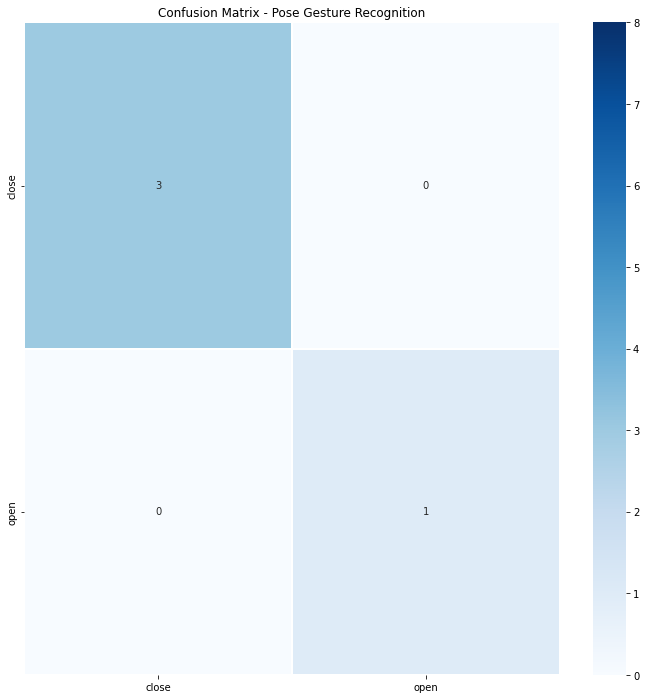

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [str(x) for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Pose Gesture Recognition")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [106]:
import pickle

# save model
with open('BAnQ_2.pkl','wb') as f:
    pickle.dump(svm,f)